In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/glass/glass.csv


# Data preparation

In [2]:
! pip install -q scikit-plot
! pip install -q pydotplus

import pandas as pd
import sklearn as sk
import graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from IPython.core.pylabtools import figsize
import seaborn as sns
import scikitplot as skplt
import pydotplus
import matplotlib.image as mpimg
import io

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
    
    
data_glass_raw = pd.read_csv("/kaggle/input/glass/glass.csv") #all data
features_data = data_glass_raw.iloc[:,0:9]#features data
labels = data_glass_raw.iloc[:,9:]#labels data
feature_names = list(data_glass_raw.columns.values)[0:9]#feature names


In [3]:
print(features_data)
print(feature_names)
print(labels)


          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
     Type
0       1
1       1
2       1
3       1
4       1
..    ...
209     7
210     7
211     7
212     7
213     7

[214 rows x 1 columns]


# Data overview

In [4]:
describe = data_glass_raw.describe()
describe = pd.DataFrame(describe)
describe.style.background_gradient(cmap='PuRd')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214,214,214,214,214,214,214,214,214,214
mean,1.51837,13.4079,2.68453,1.44491,72.6509,0.497056,8.95696,0.175047,0.0570093,2.78037
std,0.00303686,0.816604,1.44241,0.49927,0.774546,0.652192,1.42315,0.497219,0.0974387,2.10374
min,1.51115,10.73,0,0.29,69.81,0,5.43,0,0,1
25%,1.51652,12.9075,2.115,1.19,72.28,0.1225,8.24,0,0,1
50%,1.51768,13.3,3.48,1.36,72.79,0.555,8.6,0,0,2
75%,1.51916,13.825,3.6,1.63,73.0875,0.61,9.1725,0,0.1,3
max,1.53393,17.38,4.49,3.5,75.41,6.21,16.19,3.15,0.51,7


In [5]:
data_glass_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data_glass_raw['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Distribution check

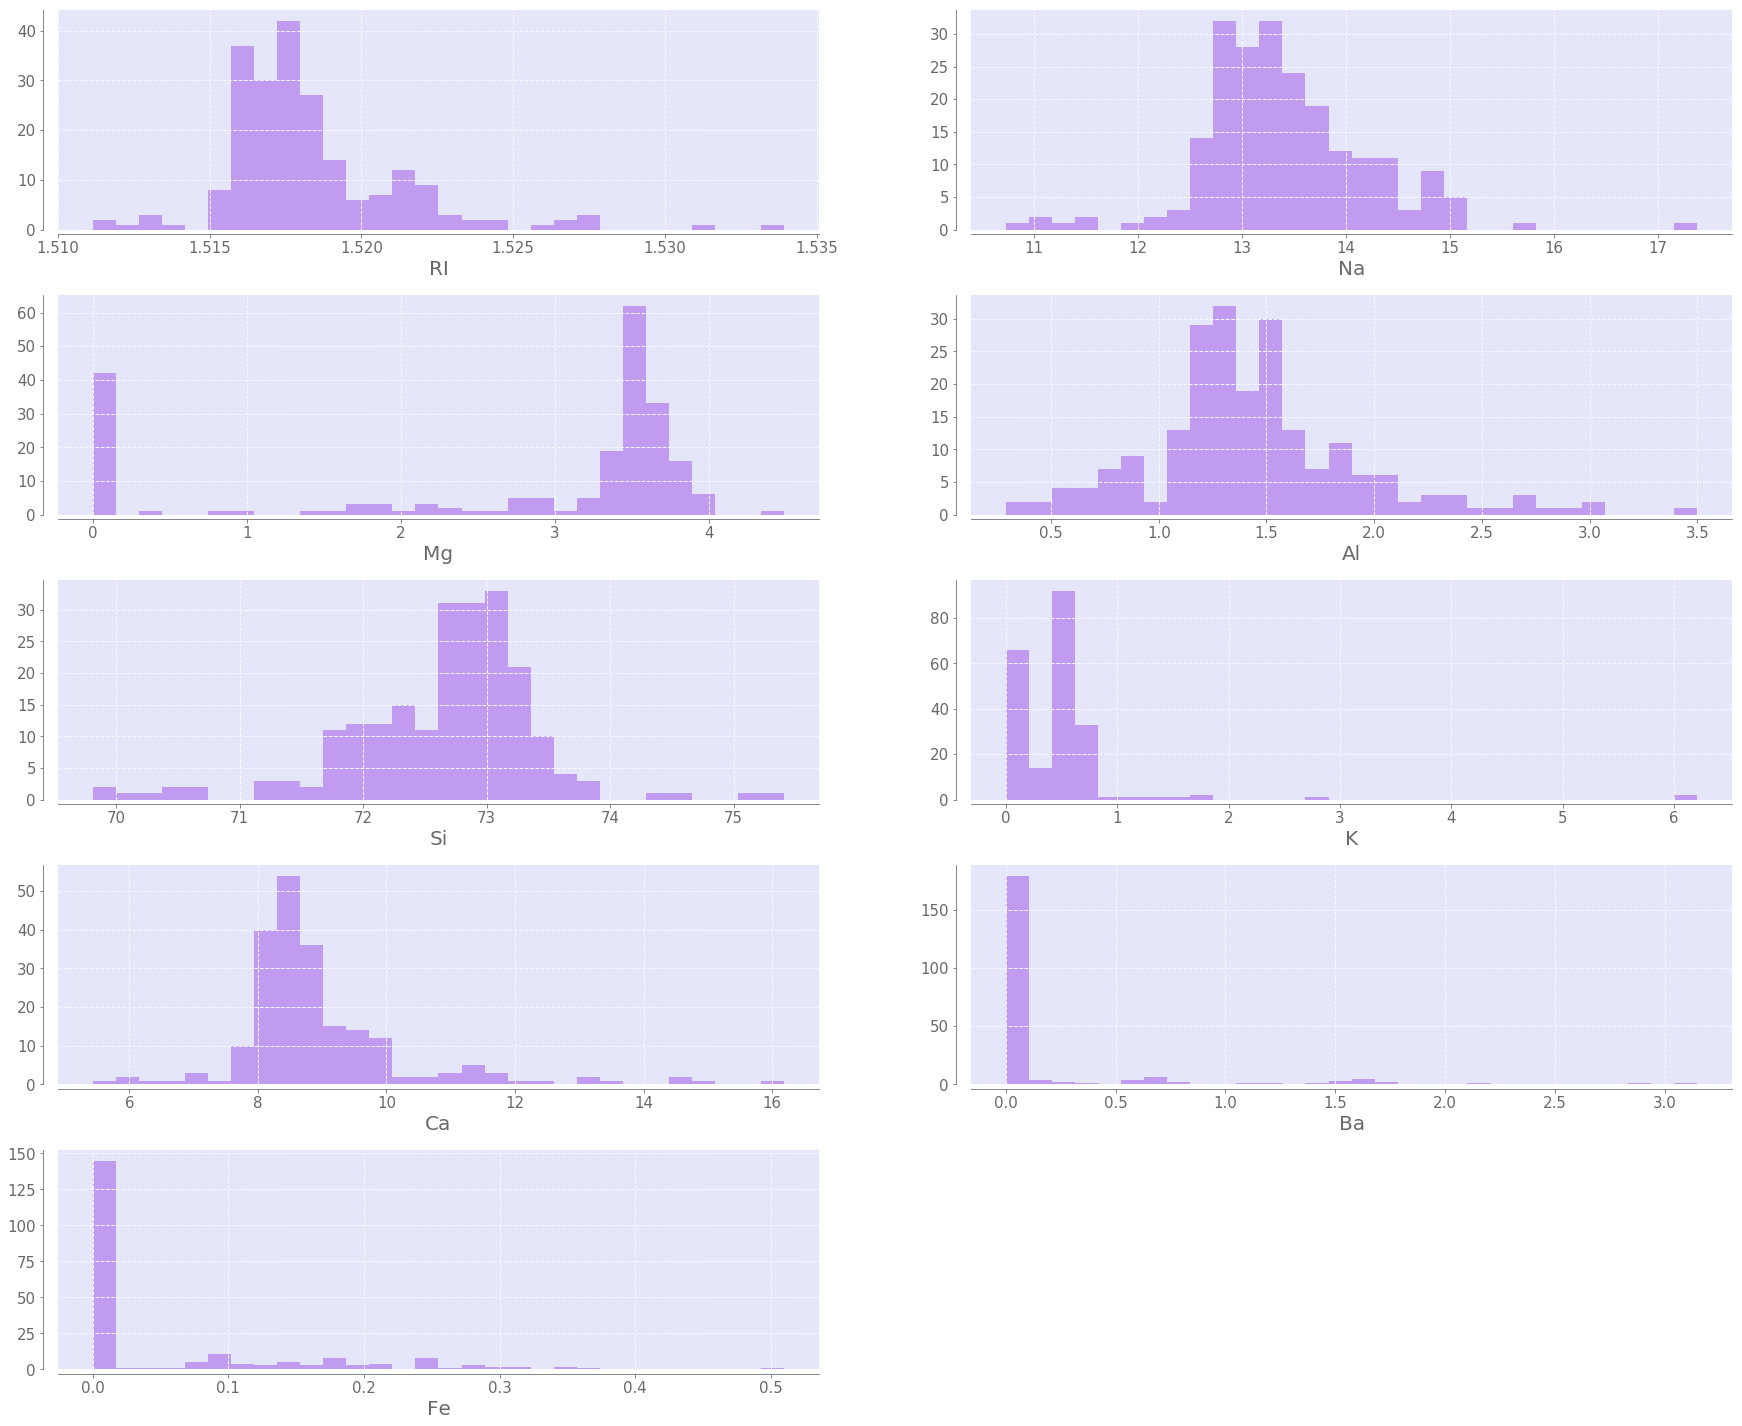

In [9]:
fig, ax = plt.subplots(5,2, figsize=(30,25), constrained_layout=True)
ax = ax.flatten()

for  i, feature in enumerate(feature_names):
    plt.subplot(5,2,i + 1)
    plt.subplots_adjust(hspace = 0.3)
    skew = features_data[feature].skew()
    ax[i] = sns.distplot(features_data[feature], label='Skew = %.2f' % (skew), kde= False, bins=30, color = 'blueviolet')
    ax[i].set_facecolor('lavender')
    ax[i].grid(color='ghostwhite', linestyle='--', linewidth=1)
    ax[i].spines['bottom'].set_position(('axes', -0.02))
    ax[i].spines['left'].set_position(('axes', -0.02))
    ax[i].spines['top'].set_color('none')
    ax[i].spines['right'].set_color('none')
    ax[i].xaxis.set_tick_params(color = 'dimgray', labelsize=15)
    ax[i].yaxis.set_tick_params(color = 'dimgray', labelsize=15)
    ax[i].tick_params(axis='x', colors='dimgray')
    ax[i].tick_params(axis='y', colors='dimgray')
    plt.rcParams['axes.edgecolor']='dimgrey'
    ax[i].set_xlabel(feature, fontsize=20, color = 'dimgray')
    
fig.delaxes(ax[9])   

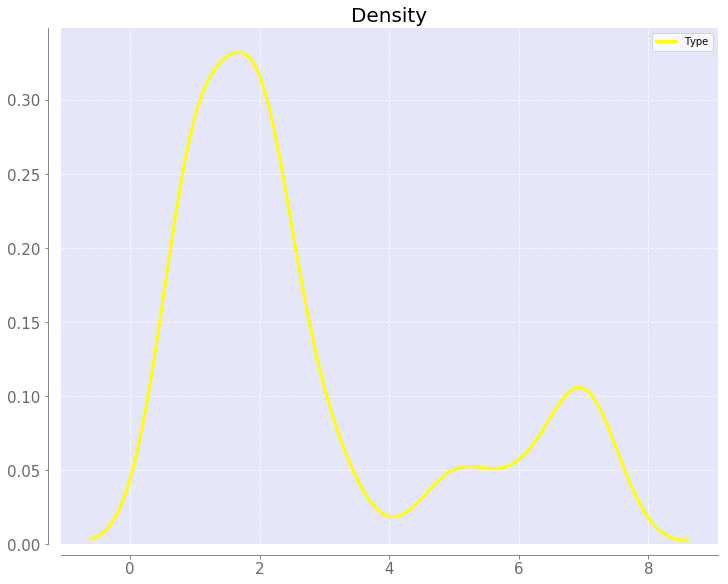

In [10]:
fig = plt.figure(figsize= [10,8],constrained_layout=True)

densityplot = sns.kdeplot(data_glass_raw['Type'], color = 'yellow', linewidth=3)
densityplot = plt.gca()
densityplot.set_title('Density', fontsize = 20)
densityplot.set_facecolor('lavender')
densityplot.grid(color='ghostwhite', linestyle='--', linewidth=1)
densityplot.spines['bottom'].set_position(('axes', -0.02))
densityplot.spines['left'].set_position(('axes', -0.02))
densityplot.spines['top'].set_color('none')
densityplot.spines['right'].set_color('none')
densityplot.tick_params(axis='x', colors='dimgray')
densityplot.tick_params(axis='y', colors='dimgray')
densityplot.xaxis.set_tick_params(color = 'dimgray', labelsize=15)
densityplot.yaxis.set_tick_params(color = 'dimgray', labelsize=15)

# Detecting outliers - IQR range method 

In [11]:
for column in data_glass_raw:
#first and third quartile    
    first_quartile = data_glass_raw[column].describe()['25%']
    third_quartile = data_glass_raw[column].describe()['75%']
#interquartile range
    iqr = third_quartile - first_quartile
    outliers = ((data_glass_raw[column] > (first_quartile - 3 * iqr)) &
            (data_glass_raw[column] < (third_quartile + 3 * iqr))) 
        
    print(outliers.value_counts())   

True     209
False      5
Name: RI, dtype: int64
True     213
False      1
Name: Na, dtype: int64
True    214
Name: Mg, dtype: int64
True     211
False      3
Name: Al, dtype: int64
True     213
False      1
Name: Si, dtype: int64
True     211
False      3
Name: K, dtype: int64
True     204
False     10
Name: Ca, dtype: int64
False    214
Name: Ba, dtype: int64
True     213
False      1
Name: Fe, dtype: int64
True    214
Name: Type, dtype: int64


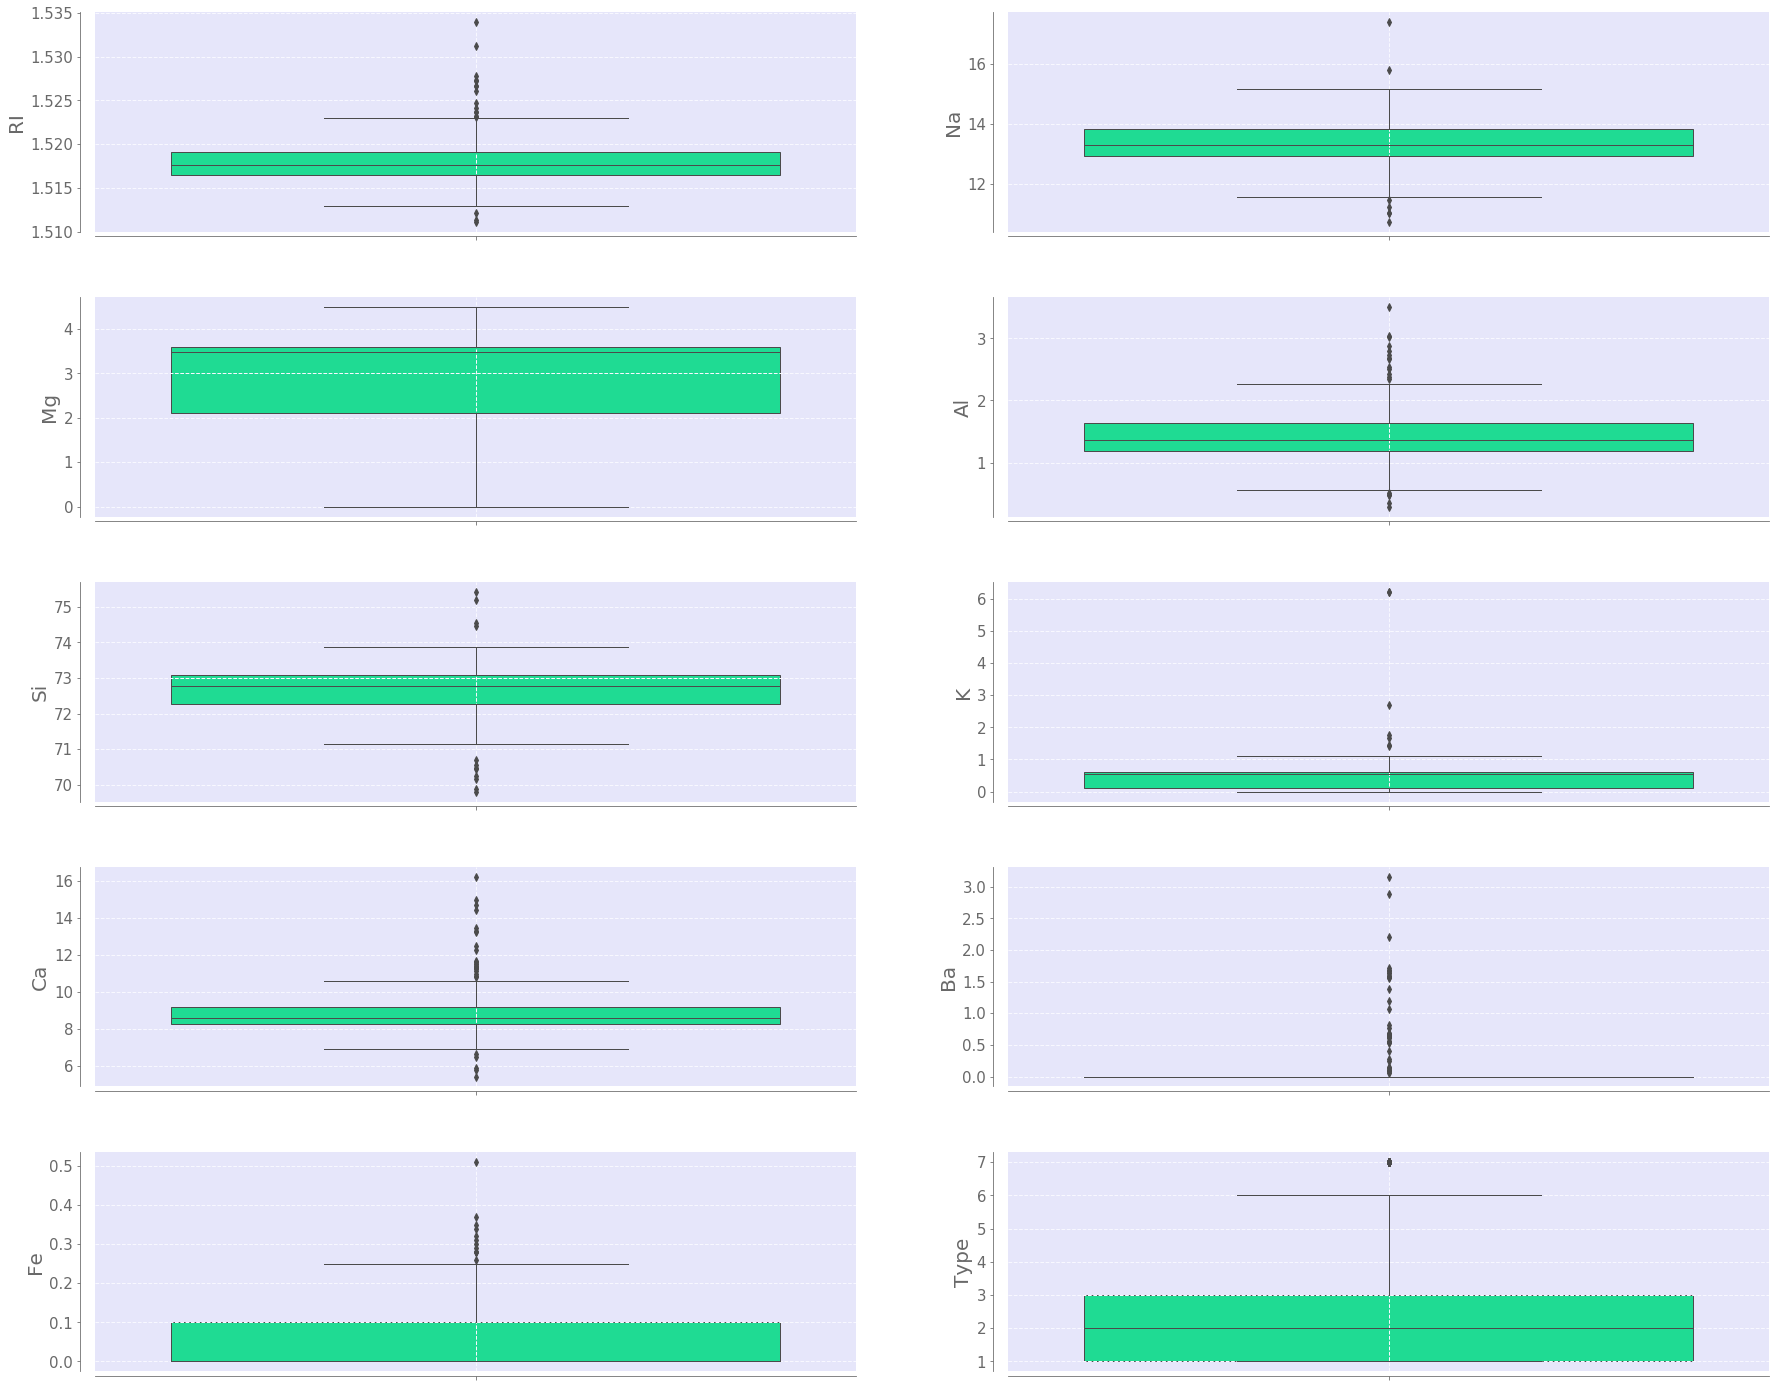

In [12]:
fig, ax = plt.subplots(5,2, figsize=(30,25), constrained_layout=True)
ax = ax.flatten()

for  i, column in enumerate(data_glass_raw):
    plt.subplot(5,2,i + 1)
    plt.subplots_adjust(hspace = 0.3)
    ax[i] = sns.boxplot(data_glass_raw[column], orient = 'v', color = 'mediumspringgreen', linewidth=1)
    ax[i].set_facecolor('lavender')
    ax[i].grid(color='ghostwhite', linestyle='--', linewidth=1)
    ax[i].spines['bottom'].set_position(('axes', -0.02))
    ax[i].spines['left'].set_position(('axes', -0.02))
    ax[i].spines['top'].set_color('none')
    ax[i].spines['right'].set_color('none')
    ax[i].xaxis.set_tick_params(color = 'dimgray', labelsize=15)
    ax[i].yaxis.set_tick_params(color = 'dimgray', labelsize=15)
    ax[i].tick_params(axis='x', colors='dimgray')
    ax[i].tick_params(axis='y', colors='dimgray')
    plt.rcParams['axes.edgecolor']='dimgrey'
    ax[i].set_ylabel(column, fontsize=20, color = 'dimgray')
    

Remove outliers for Na, Al, Si, K, Ca, Fe

In [13]:
features_outliers = data_glass_raw[['RI','Na','Al','Si','K','Ca','Fe']]
features_outliers = list(features_outliers)

for feature_outliers in features_outliers:
#first and third quartile    
    first_quartile = data_glass_raw[feature_outliers].describe()['25%']
    third_quartile = data_glass_raw[feature_outliers].describe()['75%']
#interquartile range
    iqr = third_quartile - first_quartile
    data_glass_raw = data_glass_raw[(data_glass_raw[feature_outliers] > (first_quartile - 3 * iqr)) &
            (data_glass_raw[feature_outliers] < (third_quartile + 3 * iqr))]
    
features_data = data_glass_raw.iloc[:,0:9]#features data
labels = data_glass_raw.iloc[:,9:]#labels data
feature_names = list(data_glass_raw.columns.values)[0:9]#feature names
    


In [14]:
print(features_data)
print(feature_names)
print(labels)


          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[197 rows x 9 columns]
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
     Type
0       1
1       1
2       1
3       1
4       1
..    ...
209     7
210     7
211     7
212     7
213     7

[197 rows x 1 columns]


# Correlation check

In [15]:
correlations_data = data_glass_raw.corr()['Type'].sort_values()
correlations_data = pd.DataFrame(correlations_data)
correlations_data.style.background_gradient(cmap='PuRd')

,Type
Mg,-0.827158
K,-0.411175
Fe,-0.203626
RI,-0.110988
Ca,0.139025
Si,0.176333
Na,0.583675
Al,0.664669
Ba,0.678875
Type,1


<Figure size 576x576 with 0 Axes>

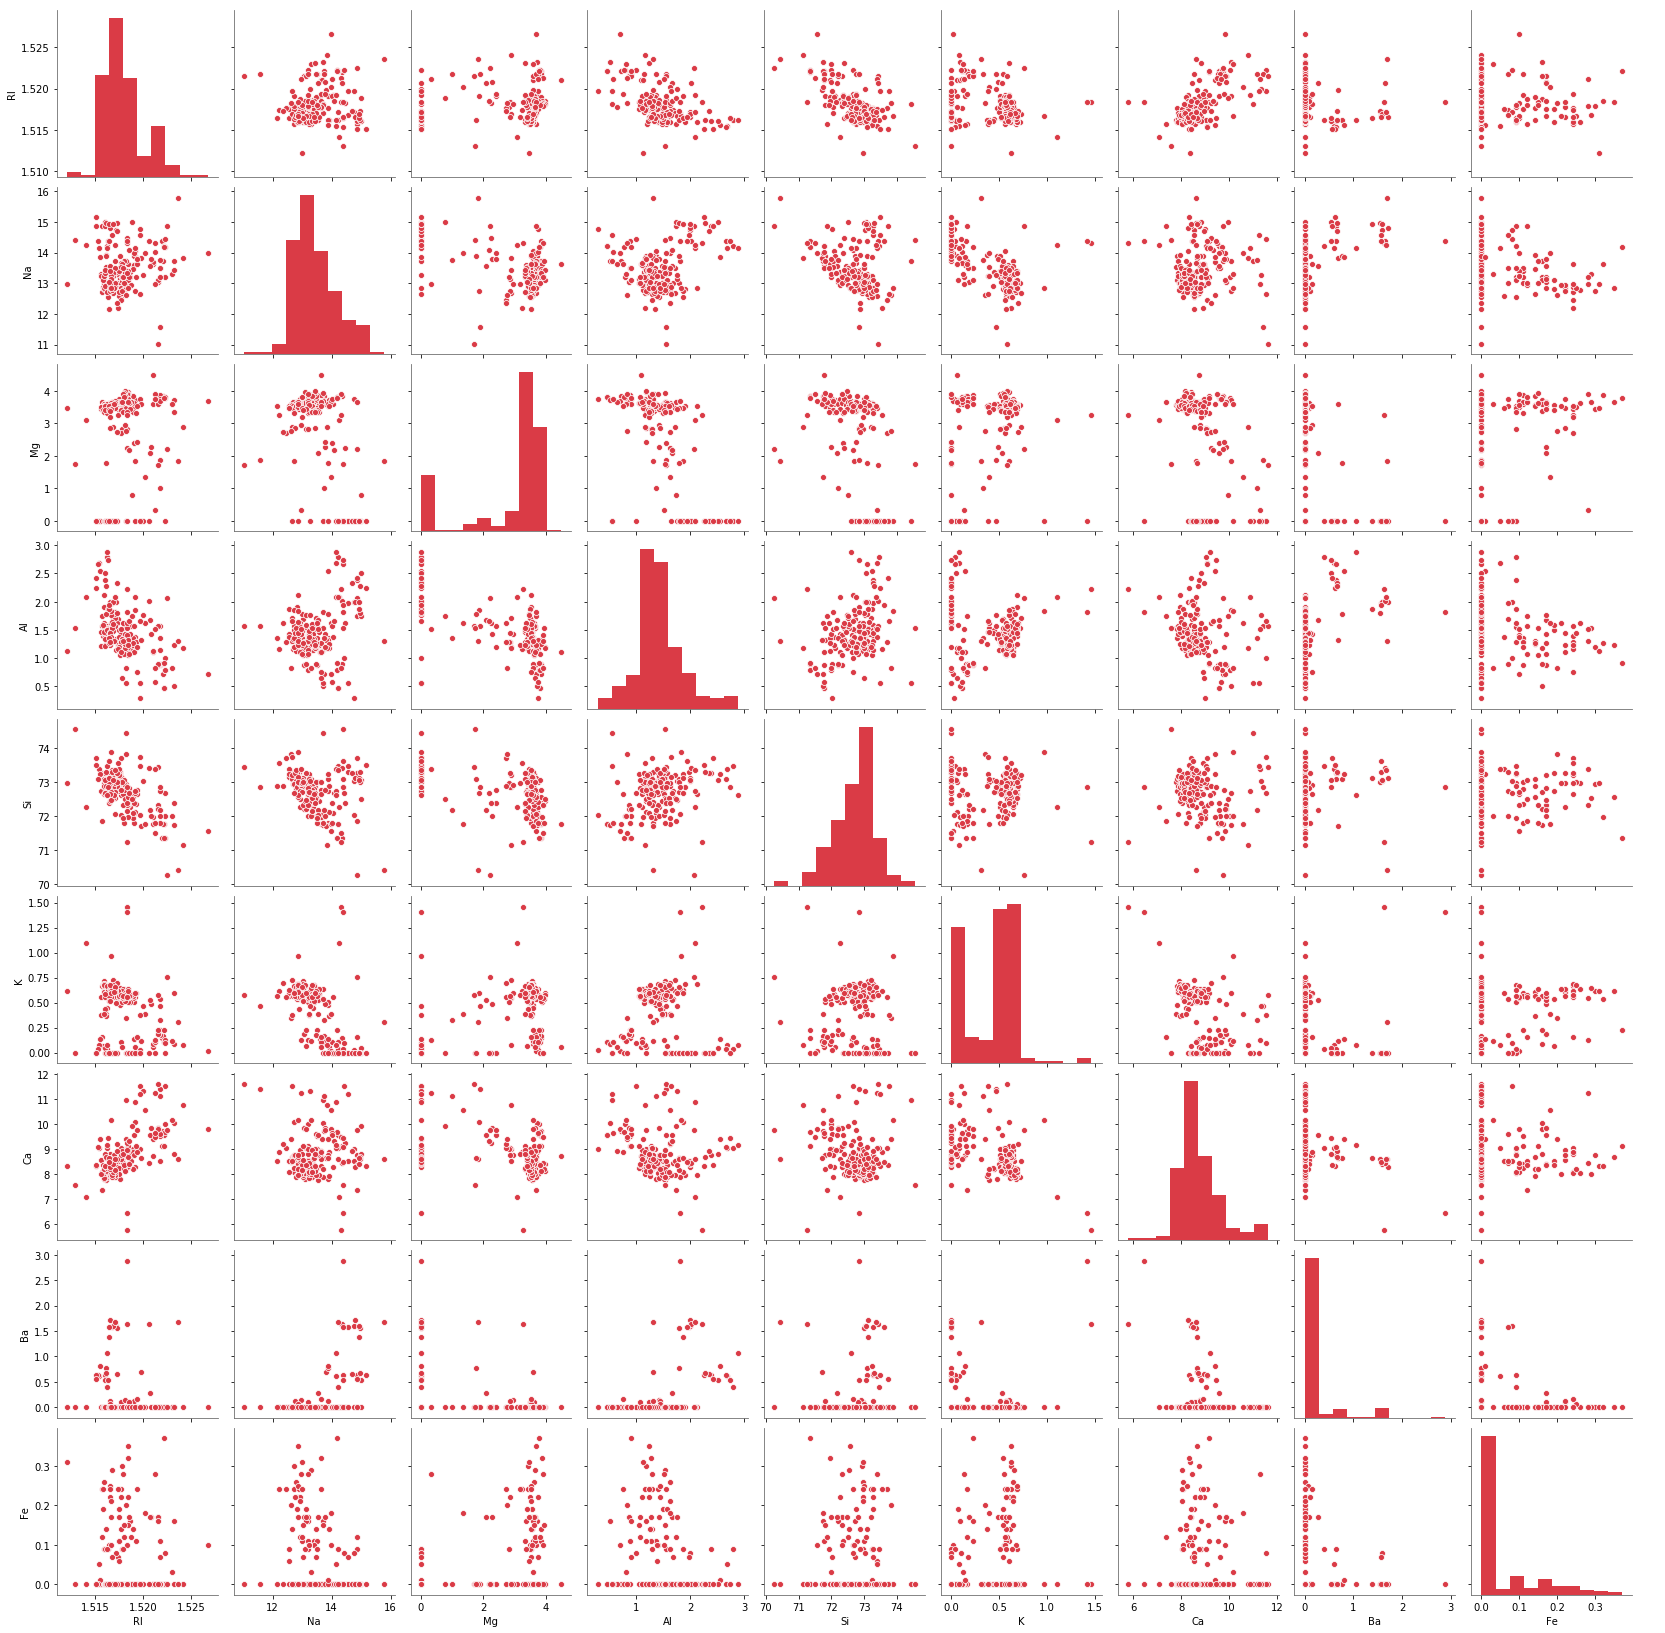

In [16]:
plt.figure(figsize=(8,8))
pallette = sns.diverging_palette(10, 220, sep=80, n=7)
sns.set_palette(pallette)
sns.pairplot(features_data)
plt.show()

# Data split for training and testin datasets

In [17]:
data_glass_train, data_glass_test, labels_train, labels_test= train_test_split(features_data,labels, shuffle = True)


# Classification & Regression Trees (CART) model

Tree classifier

In [ ]:
dot_data = io.StringIO()

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(data_glass_train, labels_train)
classes_names = ["1", "2", "3", "5", "6", "7",]

tree.export_graphviz(classifier, out_file=dot_data,feature_names=feature_names,class_names=classes_names,  filled=True, rounded=True, special_characters=True)  
filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(70,70))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

# Prediction

In [ ]:
labels_prediction = classifier.predict(data_glass_test)

# Measuring Model Performance

In [ ]:
accuracy = classifier.score(data_glass_test, labels_test)
precision_tree = precision_score(labels_test,labels_prediction, average='macro')
print("Accuracy "+ str(accuracy))
print("Precision " + str(round(precision_tree,2)))


Confusion_matrix

In [ ]:
skplt.metrics.plot_confusion_matrix(
    labels_test, 
    labels_prediction,
    figsize=(12,12),
    cmap= 'RdPu')

# Tree pruning

Maximum depth

In [ ]:
maximum_depth_range = list(range(1,10))
accurancy_max_depth = []

for i in maximum_depth_range:
    best_classifier_depth = DecisionTreeClassifier(max_depth = i, random_state = 0)
    best_classifier_depth.fit(data_glass_train,labels_train)
    
    best_score = best_classifier_depth.score(data_glass_test,labels_test)
    accurancy_max_depth.append(best_score)

fig = plt.figure(figsize= [8,5],constrained_layout=True)
plot_depth = plt.plot(maximum_depth_range,accurancy_max_depth, color='violet',linewidth=2)
plot_depth = plt.gca()
plot_depth.set_title('Density', fontsize = 10, color='dimgray')
plot_depth.set_xlabel('Maximum Depth', fontsize=10, color='dimgray') 
plot_depth.set_ylabel('Accurancy', fontsize=10, color='dimgray') 
plot_depth.set_facecolor('lavender')
plot_depth.grid(color='ghostwhite', linestyle='--', linewidth=1)
plot_depth.spines['bottom'].set_position(('axes', -0.02))
plot_depth.spines['left'].set_position(('axes', -0.02))
plot_depth.spines['top'].set_color('none')
plot_depth.spines['right'].set_color('none')
plot_depth.tick_params(axis='x', colors='dimgray')
plot_depth.tick_params(axis='y', colors='dimgray')
plot_depth.xaxis.set_tick_params(color = 'dimgray', labelsize=10)
plot_depth.yaxis.set_tick_params(color = 'dimgray', labelsize=10)

best_accuracy_depth = max(accurancy_max_depth)
index = accurancy_max_depth.index(best_accuracy_depth) 
best_depth = maximum_depth_range[index]
print('Accurancy for model with maximum depth equal to ' + str(best_depth) + " is " + str(best_accuracy_depth))


Minimum samples leaf

In [ ]:
minimum_samples_leaf = np.linspace(1,10,10, endpoint=True)
accurancy_minimum_samples_leaf = []

for i in minimum_samples_leaf:
    best_classifier_leaf = DecisionTreeClassifier(min_samples_leaf=int(i), random_state = 0)
    best_classifier_leaf.fit(data_glass_train,labels_train)
    
    best_score = best_classifier_leaf.score(data_glass_test,labels_test)
    accurancy_minimum_samples_leaf.append(best_score)   

fig = plt.figure(figsize= [8,5],constrained_layout=True)
plot_leaf = plt.plot(minimum_samples_leaf,accurancy_minimum_samples_leaf )
plot_leaf = plt.gca()
plot_leaf.set_title('Density', fontsize = 10, color='dimgray')
plot_leaf.set_xlabel('Minimum_samples_leaf', fontsize=10, color='dimgray') 
plot_leaf.set_ylabel('Accurancy', fontsize=10, color='dimgray') 
plot_leaf.set_facecolor('lavender')
plot_leaf.grid(color='ghostwhite', linestyle='--', linewidth=1)
plot_leaf.spines['bottom'].set_position(('axes', -0.02))
plot_leaf.spines['left'].set_position(('axes', -0.02))
plot_leaf.spines['top'].set_color('none')
plot_leaf.spines['right'].set_color('none')
plot_leaf.tick_params(axis='x', colors='dimgray')
plot_leaf.tick_params(axis='y', colors='dimgray')
plot_leaf.xaxis.set_tick_params(color = 'dimgray', labelsize=10)
plot_leaf.yaxis.set_tick_params(color = 'dimgray', labelsize=10)

best_accuracy_leaf = max(accurancy_minimum_samples_leaf)
minimum_sample = minimum_samples_leaf[index]
print('Accurancy for model with minimum samples of leaf equal to ' + str(minimum_sample) + " is " + str(best_accuracy_leaf))

# Best model

In [ ]:

dot_data_best = io.StringIO()
tree.export_graphviz(best_classifier_leaf, out_file=dot_data_best,feature_names=feature_names, class_names=classes_names,filled=True, rounded=True, special_characters=True) 
filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data_best.getvalue()).write_png(filename)

plt.figure(figsize=(50,50))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

Prediction from best model

In [ ]:
labels_prediction_best = best_classifier_leaf.predict(data_glass_test)

Confusion matrix of best model

In [ ]:
skplt.metrics.plot_confusion_matrix(
    labels_test, 
    labels_prediction_best,
    figsize=(12,12),
    cmap= 'BuPu')

Precision

In [ ]:
precision_best = precision_score(labels_test,labels_prediction_best, average='micro')
print("Precision for best model is " +  str(precision_best))

Importance of features

In [ ]:
importance = pd.DataFrame({'Feature':data_glass_test.columns,'Importance': np.round(best_classifier_leaf.feature_importances_,3)})
importance.sort_values('Importance',ascending=False)
importance.style.background_gradient(cmap='PuRd')

In [ ]:
print(labels_prediction_best)